# McNemar Chi-Squares

The McNemar Chi-Square is used when you are trying to look at something over time, and have only two timepoints; maybe a pre and a post. The timepoints are your independent variable. You are also limited to two levels of your dependent variable. You can think of a McNemar Chi-Square like a dependent *t*-test for categorical data.

In [6]:
library(gmodels)
library(tidyr)
library(readr)

In [8]:
bake_sales = read_csv("/Users/julieraeboucher/Desktop/WORK/WozU /Datasets/bakery_sales.csv")

Rows: 21293 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Date, Item
dbl  (1): Transaction
time (1): Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
head(bake_sales)

Date,Time,Transaction,Item
<chr>,<time>,<dbl>,<chr>
10/30/2016,09:58:11,1,Bread
10/30/2016,10:05:34,2,Scandinavian
10/30/2016,10:05:34,2,Scandinavian
10/30/2016,10:07:57,3,Hot chocolate
10/30/2016,10:07:57,3,Jam
10/30/2016,10:07:57,3,Cookies


In [10]:
names(bake_sales)

[1] "Date"        "Time"        "Transaction" "Item"

In [11]:
str(bake_sales)

spc_tbl_ [21,293 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date       : chr [1:21293] "10/30/2016" "10/30/2016" "10/30/2016" "10/30/2016" ...
 $ Time       : 'hms' num [1:21293] 09:58:11 10:05:34 10:05:34 10:07:57 ...
  ..- attr(*, "units")= chr "secs"
 $ Transaction: num [1:21293] 1 2 2 3 3 3 4 5 5 5 ...
 $ Item       : chr [1:21293] "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_character(),
  ..   Time = col_time(format = ""),
  ..   Transaction = col_double(),
  ..   Item = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [49]:
bake_sales1 <- aggregate(Transaction~Item, bake_sales, sum)
bake_sales1

Item,Transaction
<chr>,<dbl>
Adjustment,938
Afternoon with the baker,286028
Alfajores,1512575
Argentina Night,64153
Art Tray,140877
Bacon,1248
Baguette,1109334
Bakewell,272027
Bare Popcorn,22420


#### Reformatting to a Date

In [12]:
bake_sales$DateR <- as.Date(bake_sales$Date, format="%m/%d/%Y")

#### Separating the Date Variable

In [13]:
bake_sales1 <- separate(bake_sales, DateR, c("Year", "Month", "Day"), sep="-")

#### Recoding to seperate the `Beginning` or `End` of Month

In [14]:
bake_sales1$DayR <- NA
bake_sales1$DayR[bake_sales1$Day <= 15] <- 0
bake_sales1$DayR[bake_sales1$Day > 15] <- 1

#### Recoding to Coffee or Other

The last recode you have left to undertake is to recode the ```Item``` variable from listing every single item out to recoding into the discrete categories of coffee or not coffee. Below, you'll find code that creates a new variable named ```CoffeeSales``` and fills it with a 1 for anything that is ```Coffee``` and fills it with a 0 for anything that is not coffee.

In [19]:
unique(bake_sales1$Item)

[1] "Bread"                         "Scandinavian"                 
 [3] "Hot chocolate"                 "Jam"                          
 [5] "Cookies"                       "Muffin"                       
 [7] "Coffee"                        "Pastry"                       
 [9] "Medialuna"                     "Tea"                          
[11] "NONE"                          "Tartine"                      
[13] "Basket"                        "Mineral water"                
[15] "Farm House"                    "Fudge"                        
[17] "Juice"                         "Ella's Kitchen Pouches"       
[19] "Victorian Sponge"              "Frittata"                     
[21] "Hearty & Seasonal"             "Soup"                         
[23] "Pick and Mix Bowls"            "Smoothies"                    
[25] "Cake"                          "Mighty Protein"               
[27] "Chicken sand"                  "Coke"                         
[29] "My-5 Fruit Shoot"              "Focaccia"                     
[31] "Sandwich"                      "Alfajores"                    
[33] "Eggs"                          "Brownie"                      
[35] "Dulce de Leche"                "Honey"                        
[37] "The BART"                      "Granola"                      
[39] "Fairy Doors"                   "Empanadas"                    
[41] "Keeping It Local"              "Art Tray"                     
[43] "Bowl Nic Pitt"                 "Bread Pudding"                
[45] "Adjustment"                    "Truffles"                     
[47] "Chimichurri Oil"               "Bacon"                        
[49] "Spread"                        "Kids biscuit"                 
[51] "Siblings"                      "Caramel bites"                
[53] "Jammie Dodgers"                "Tiffin"                       
[55] "Olum & polenta"                "Polenta"                      
[57] "The Nomad"                     "Hack the stack"               
[59] "Bakewell"                      "Lemon and coconut"            
[61] "Toast"                         "Scone"                        
[63] "Crepes"                        "Vegan mincepie"               
[65] "Bare Popcorn"                  "Muesli"                       
[67] "Crisps"                        "Pintxos"                      
[69] "Gingerbread syrup"             "Panatone"                     
[71] "Brioche and salami"            "Afternoon with the baker"     
[73] "Salad"                         "Chicken Stew"                 
[75] "Spanish Brunch"                "Raspberry shortbread sandwich"
[77] "Extra Salami or Feta"          "Duck egg"                     
[79] "Baguette"                      "Valentine's card"             
[81] "Tshirt"                        "Vegan Feast"                  
[83] "Postcard"                      "Nomad bag"                    
[85] "Chocolates"                    "Coffee granules"              
[87] "Drinking chocolate spoons"     "Christmas common"             
[89] "Argentina Night"               "Half slice Monster"           
[91] "Gift voucher"                  "Cherry me Dried fruit"        
[93] "Mortimer"                      "Raw bars"                     
[95] "Tacos/Fajita"

In [20]:
bake_sales1$CoffeeSales <- NA
bake_sales1$CoffeeSales[bake_sales1$Item == "Coffee"] <- 1
bake_sales1$CoffeeSales[bake_sales1$Item != "Coffee"] <- 0

In [22]:
# double checking recode
unique(bake_sales1$CoffeeSales)

[1] 0 1

## Test Assumptions and Run Analyses

The assumptions for a McNemar Chi-Square is the same as for an independent Chi-Square: you need to have at least 5 expected observations in each cell.  And just like the independent Chi-Square, in R, you will need to run the entire analysis first and then check the assumption.  All the code is nearly the same, too, except that you will add in the argument of ```mcnemar=TRUE```.  Take a look: 

In [23]:
CrossTable(bake_sales1$DayR, bake_sales1$CoffeeSales, fisher=TRUE, chisq = TRUE, mcnemar = TRUE, expected = TRUE, sresid=TRUE, format="SPSS")


   Cell Contents
|-------------------------|
|                   Count |
|         Expected Values |
| Chi-square contribution |
|             Row Percent |
|          Column Percent |
|           Total Percent |
|            Std Residual |
|-------------------------|

Total Observations in Table:  21293 

                 | bake_sales1$CoffeeSales 
bake_sales1$DayR |        0  |        1  | Row Total | 
-----------------|-----------|-----------|-----------|
               0 |     8238  |     2841  |    11079  | 
                 | 8232.374  | 2846.626  |           | 
                 |    0.004  |    0.011  |           | 
                 |   74.357% |   25.643% |   52.031% | 
                 |   52.067% |   51.928% |           | 
                 |   38.689% |   13.342% |           | 
                 |    0.062  |   -0.105  |           | 
-----------------|-----------|-----------|-----------|
               1 |     7584  |     2630  |    10214  | 
                 | 7589.626  | 26

#### Check Assumption of Expected Frequencies

Assumption for McNemar needs to be minimum 5 expected for cell. Our lowest expected value is 2624.374. We met this assumption.

### Interpret Results

The p-value is < 0.05, which means this test is significant. There is a difference in coffee sales from the beginning and end of the month. 

### Post Hocs

Examining the difference between groups, as determined by post hoc analyses, is crucial. Similar to the independent Chi-Square test, it's essential to scrutinize the standardized residuals. Any value with an absolute score of 2 (whether positive or negative) deviates significantly from the expected values. However, upon careful inspection of the post hoc results (adjusted to mitigate Type I errors), it becomes apparent that none of the standardized residuals surpass the threshold of 2. Consequently, this suggests that the test lacks statistical significance.

A useful gauge in such situations is to observe the row total percentages. For instance, consider the comparison between sales percentages at the beginning and end of the month: 52% and 48% respectively. While these figures are technically distinct, they are remarkably close. The test concludes that these percentages are similar enough to be considered statistically nonsignificant

In [25]:
# Counts from McNemar's test
a <- 8238
b <- 2841
c <- 7584
d <- 2630

# Calculate confidence intervals for differences in proportions
conf_intervals <- binom.test(c(a, d), c(a + b, c + d), conf.level = 0.95)$conf.int

# Print the confidence intervals
print(conf_intervals)


[1] 0.7498385 0.7660334
attr(,"conf.level")
[1] 0.95


Imagine you have two groups (let's say "A" and "B") that you're comparing, like "Before" and "After" or "Group 1" and "Group 2". McNemar's test helps you figure out if there's a difference in proportions between these two groups. In your case, you found that there is a difference.

Now, the numbers 0.7498385 and 0.7660334 represent a range. This range is like a guess at the difference between the groups. Imagine it's like a weather forecast saying, "We're pretty sure the temperature will be between 75.0°F and 76.6°F tomorrow." In your case, the difference between your groups is somewhere between 0.7498385 and 0.7660334.

If this range includes zero (like saying the temperature could be between -0.5°F and 1.0°F), it means there might not be a real difference between the groups. But in your case, the range doesn't include zero. It's all positive numbers. So, it suggests that there is a real difference between your two groups – the proportions are not the same.

In simpler terms, your data shows that Group A (or the "Before" condition, or whatever your groups represent) is different from Group B (or the "After" condition) in terms of the thing you're measuring. The exact difference falls somewhere in that range, but you can be quite confident there's a difference because the whole range is positive.

chatGPT

### 1. Summary Statistics:
Start by calculating summary statistics for your variables of interest. For numerical variables, this includes mean, median, standard deviation, minimum, and maximum. For categorical variables, you can calculate frequencies and proportions for each category.

In [26]:
# Summary statistics for numerical variables
summary(bake_sales1$Transaction)

# Frequency table for categorical variables
table(bake_sales1$Item)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    2548    5067    4952    7329    9684 


                   Adjustment      Afternoon with the baker 
                            1                            44 
                    Alfajores               Argentina Night 
                          369                             7 
                     Art Tray                         Bacon 
                           38                             1 
                     Baguette                      Bakewell 
                          152                            48 
                 Bare Popcorn                        Basket 
                            5                             6 
                Bowl Nic Pitt                         Bread 
                            2                          3325 
                Bread Pudding            Brioche and salami 
                            4                             3 
                      Brownie                          Cake 
                          379                          1025 
                Caramel

### 2. Data Visualization:
Visualizations can provide valuable insights into your data. Here are a few types of plots you can create:

#### a. Histograms:
Histograms help you understand the distribution of numerical variables.

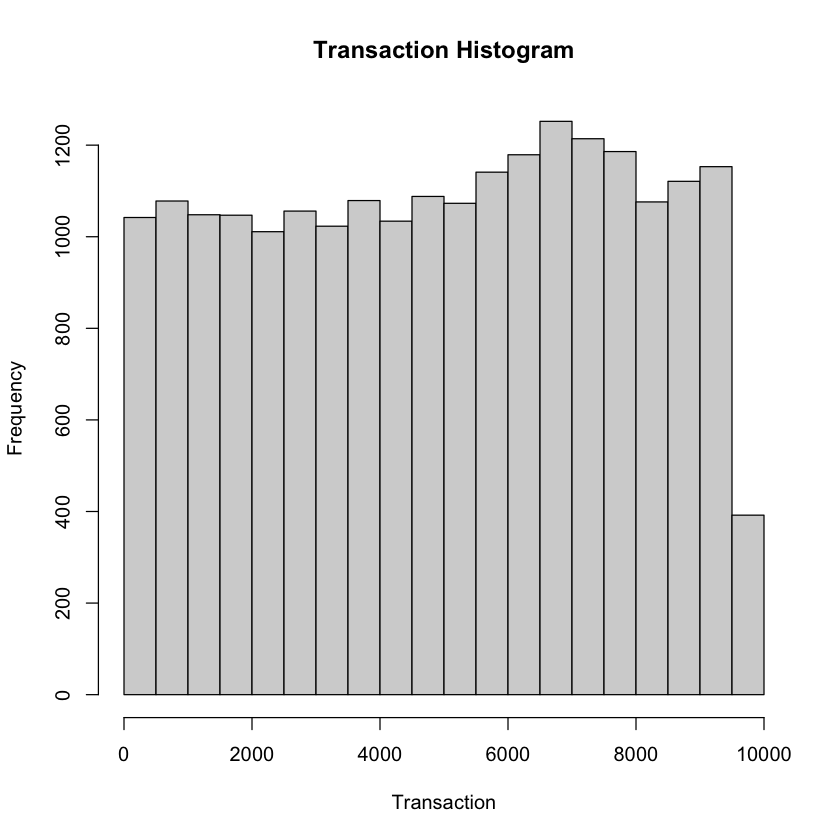

In [27]:
hist(bake_sales1$Transaction, main = "Transaction Histogram", xlab = "Transaction")


#### b. Bar Charts:
Bar charts are useful for visualizing the frequency of categorical variables.

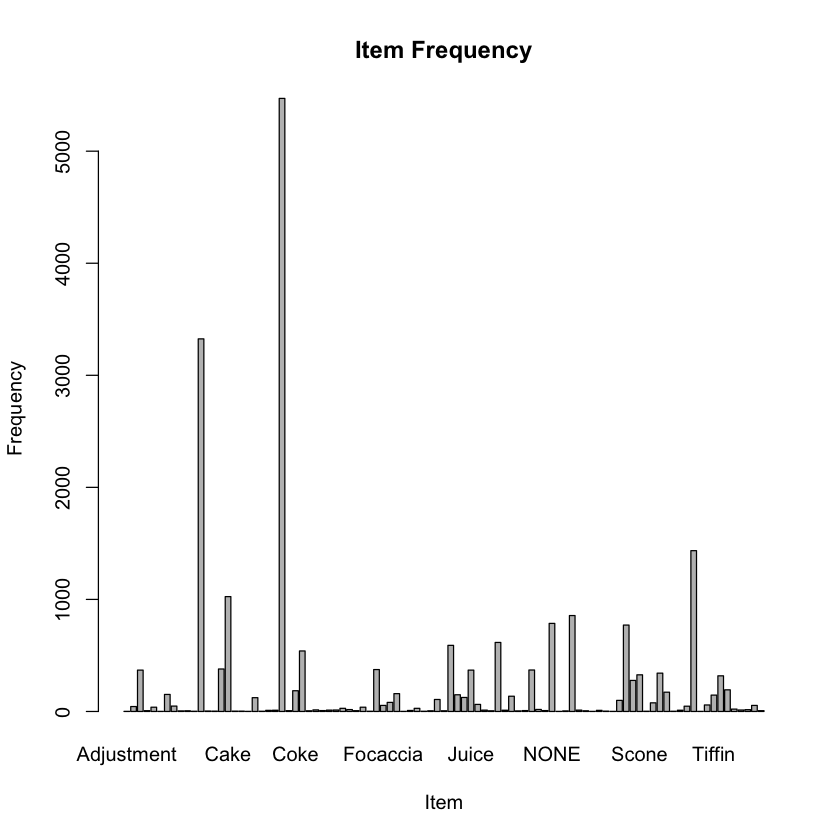

In [28]:
barplot(table(bake_sales1$Item), main = "Item Frequency", xlab = "Item", ylab = "Frequency")


#### c. Box Plots:
Box plots can help you identify outliers in numerical variables.

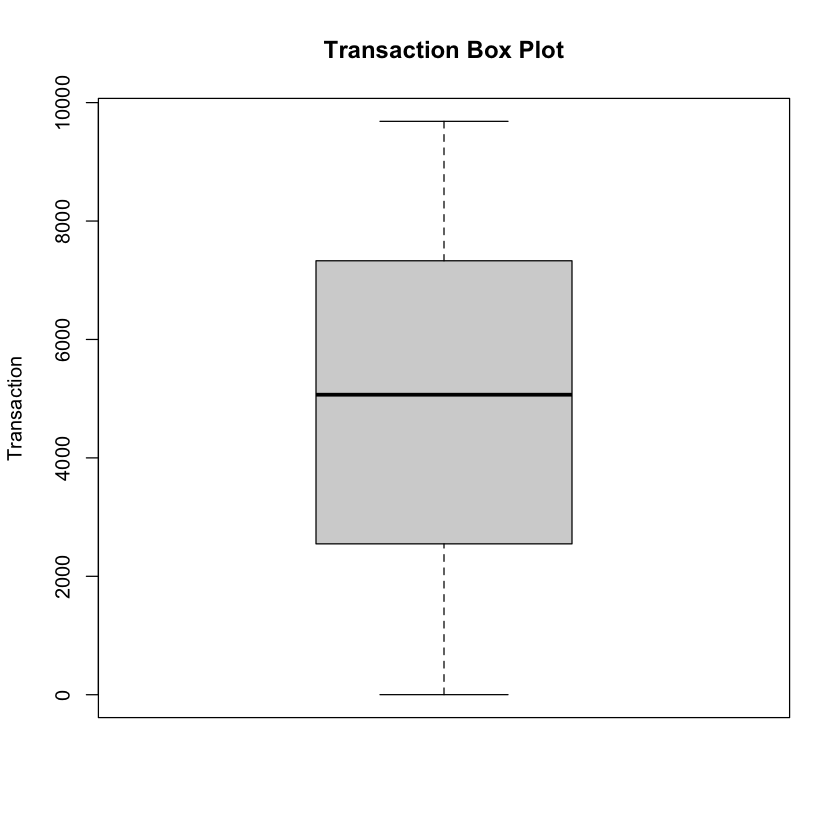

In [29]:
boxplot(bake_sales1$Transaction, main = "Transaction Box Plot", ylab = "Transaction")


#### d. Scatter Plots:
Scatter plots are useful for visualizing relationships between two numerical variables.

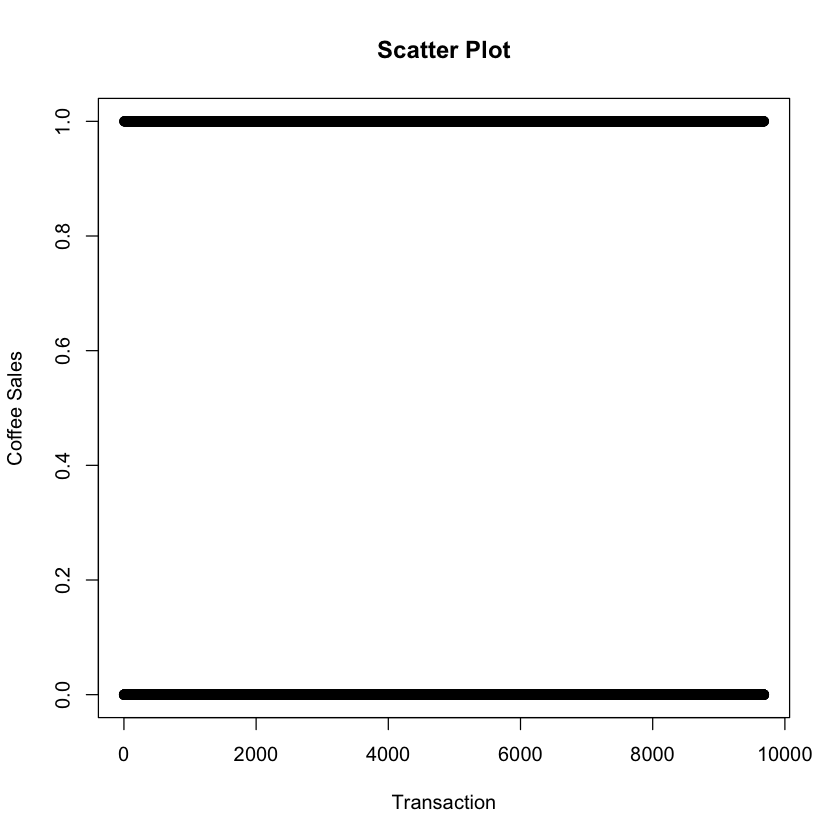

In [30]:
plot(bake_sales1$Transaction, bake_sales1$CoffeeSales, main = "Scatter Plot", xlab = "Transaction", ylab = "Coffee Sales")


### 3. Correlation Analysis:
If you have multiple numerical variables, you can calculate correlations to identify relationships between them.

In [31]:
cor(bake_sales1$Transaction, bake_sales1$CoffeeSales)


[1] -0.0003194417

### 4. Grouped Analysis:
Explore the relationship between variables by grouping your data and creating summary statistics or visualizations for each group.

In [32]:
# Example: Mean Transaction for each Item category
aggregate(bake_sales1$Transaction, by = list(Item = bake_sales1$Item), FUN = mean)


Item,x
<chr>,<dbl>
Adjustment,938.0000
Afternoon with the baker,6500.6364
Alfajores,4099.1192
Argentina Night,9164.7143
Art Tray,3707.2895
Bacon,1248.0000
Baguette,7298.2500
Bakewell,5667.2292
Bare Popcorn,4484.0000


### 5. Time Series Analysis (if applicable):
If your data has a time component, explore trends, patterns, and seasonality.

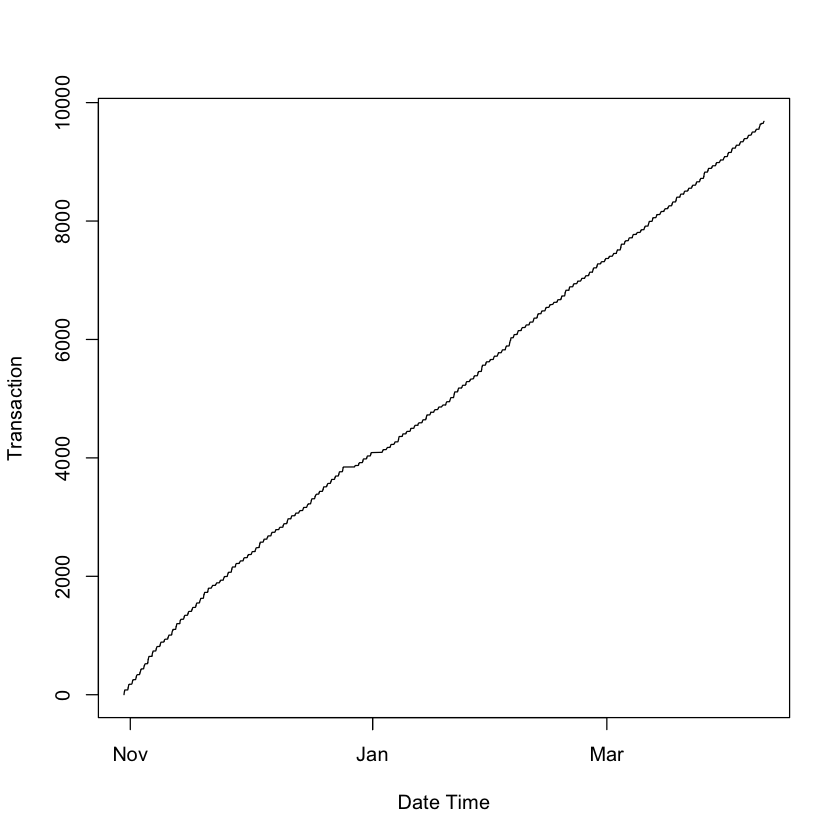

In [33]:
# Example: Time series plot for transactions over time
bake_sales1$DateTime <- as.POSIXct(paste(bake_sales1$Date, bake_sales1$Time), format="%m/%d/%Y %H:%M:%S")
plot(bake_sales1$DateTime, bake_sales1$Transaction, type = "l", xlab = "Date Time", ylab = "Transaction")
